In [3]:
import pywt
import re
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import math
import  os
import scipy.io as sio
import time
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [4]:
    data_path = r'data\centrifugal pump'##原始数据地址
    save_path=r'nonoise_data'

In [5]:
def show_plot(data,show_num):
    data_list = []
    for a in data[:show_num]:
        data_list.append(a)
    return data_list

In [6]:
def show_data(data):
    x=range(len(data))
    print(data)
    print(len(data))
    print(type(data))
    plt.plot(x,data)

# 正常数据

In [21]:
data1_nomal=np.loadtxt(os.path.join(data_path, 'normal\data_000001.txt'))

In [28]:
print(data1_nomal[2014])

-7.368


[-10.066  -6.256   5.512 ...   8.192  -1.074  -7.368]
2015
<class 'numpy.ndarray'>


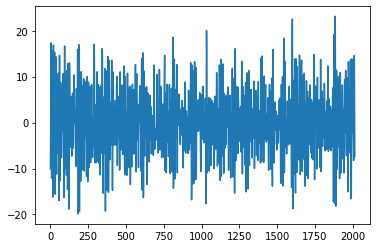

In [22]:
show_data(data1_nomal)

# 机械轴故障

In [23]:
data2_bearing_failure=np.loadtxt(os.path.join(data_path, 'bearing_failure\data_000001.txt'))

[-10.566 -38.258 -49.746 ...  -9.784  -3.704 -18.012]
2015
<class 'numpy.ndarray'>


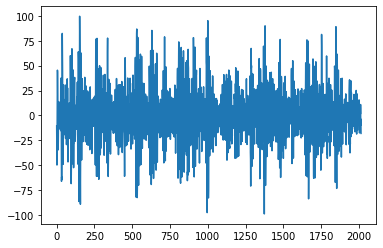

In [24]:
show_data(data2_bearing_failure)

# 不平衡

[ -0.538  -9.656 -12.94  ...  10.882   9.766   2.612]
2015
<class 'numpy.ndarray'>


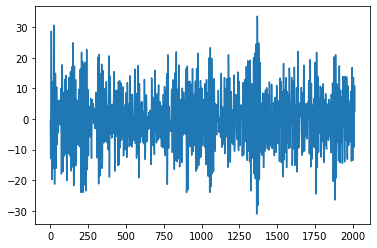

In [25]:
data3_imbalance=np.loadtxt(os.path.join(data_path, 'imbalance\data_000001.txt'))
show_data(data3_imbalance)

# 叶片缺相

[-5.3847618  6.3273897 -5.3824053 ...  2.092634  -0.7918074 -5.2669334]
2015
<class 'numpy.ndarray'>


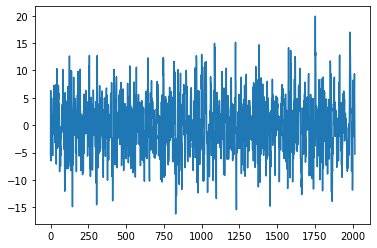

In [26]:
data4_phaseless_leaves=np.loadtxt(os.path.join(data_path, 'phaseless_leaves\data_000001.txt'))
show_data(data4_phaseless_leaves)

In [67]:
data=data4_phaseless_leaves.reshape(-1,1)
scaler = MinMaxScaler()
data_n = scaler.fit_transform(data)
print(data_n)

[[0.29949735]
 [0.62393107]
 [0.29956262]
 ...
 [0.50662576]
 [0.42672498]
 [0.30276127]]


# 数据预处理

In [7]:
def data_load(path):
    # 不归一化
    data = loadtxt(path)
    data_cut = []
    data_cut.append(data)
    return data_cut

In [8]:
data_97=data_load(os.path.join(data_path, 'phaseless_leaves','data_000001.txt'))
print(np.asarray(data_97,dtype = 'float').shape)

(1, 2015)


# 批量处理

## 正常数据

In [9]:
label=[]
data_train=[]
file_1=os.listdir(data_path)
d = 0
for k in file_1:
        d_path=os.path.join(data_path, k)
        filenames = os.listdir(d_path)
        #d_str=str(d)
        #d=d+1
        print(str(k),d)
        for i in filenames:
            data_set = os.path.join(d_path ,i)
            data1=data_load(data_set)
            label.append(d)
            data_train=data_train+data1
            print(str(d_path),str(k),np.asarray(data_train,dtype = 'float').shape)
        d=d+1

bearing_failure 0
data\centrifugal pump\bearing_failure bearing_failure (1, 2015)
data\centrifugal pump\bearing_failure bearing_failure (2, 2015)
data\centrifugal pump\bearing_failure bearing_failure (3, 2015)
data\centrifugal pump\bearing_failure bearing_failure (4, 2015)
data\centrifugal pump\bearing_failure bearing_failure (5, 2015)
data\centrifugal pump\bearing_failure bearing_failure (6, 2015)
data\centrifugal pump\bearing_failure bearing_failure (7, 2015)
data\centrifugal pump\bearing_failure bearing_failure (8, 2015)
data\centrifugal pump\bearing_failure bearing_failure (9, 2015)
data\centrifugal pump\bearing_failure bearing_failure (10, 2015)
data\centrifugal pump\bearing_failure bearing_failure (11, 2015)
data\centrifugal pump\bearing_failure bearing_failure (12, 2015)
data\centrifugal pump\bearing_failure bearing_failure (13, 2015)
data\centrifugal pump\bearing_failure bearing_failure (14, 2015)
data\centrifugal pump\bearing_failure bearing_failure (15, 2015)
data\centrifugal

data\centrifugal pump\bearing_failure bearing_failure (132, 2015)
data\centrifugal pump\bearing_failure bearing_failure (133, 2015)
data\centrifugal pump\bearing_failure bearing_failure (134, 2015)
data\centrifugal pump\bearing_failure bearing_failure (135, 2015)
data\centrifugal pump\bearing_failure bearing_failure (136, 2015)
data\centrifugal pump\bearing_failure bearing_failure (137, 2015)
data\centrifugal pump\bearing_failure bearing_failure (138, 2015)
data\centrifugal pump\bearing_failure bearing_failure (139, 2015)
data\centrifugal pump\bearing_failure bearing_failure (140, 2015)
data\centrifugal pump\bearing_failure bearing_failure (141, 2015)
data\centrifugal pump\bearing_failure bearing_failure (142, 2015)
data\centrifugal pump\bearing_failure bearing_failure (143, 2015)
data\centrifugal pump\bearing_failure bearing_failure (144, 2015)
data\centrifugal pump\bearing_failure bearing_failure (145, 2015)
data\centrifugal pump\bearing_failure bearing_failure (146, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (261, 2015)
data\centrifugal pump\bearing_failure bearing_failure (262, 2015)
data\centrifugal pump\bearing_failure bearing_failure (263, 2015)
data\centrifugal pump\bearing_failure bearing_failure (264, 2015)
data\centrifugal pump\bearing_failure bearing_failure (265, 2015)
data\centrifugal pump\bearing_failure bearing_failure (266, 2015)
data\centrifugal pump\bearing_failure bearing_failure (267, 2015)
data\centrifugal pump\bearing_failure bearing_failure (268, 2015)
data\centrifugal pump\bearing_failure bearing_failure (269, 2015)
data\centrifugal pump\bearing_failure bearing_failure (270, 2015)
data\centrifugal pump\bearing_failure bearing_failure (271, 2015)
data\centrifugal pump\bearing_failure bearing_failure (272, 2015)
data\centrifugal pump\bearing_failure bearing_failure (273, 2015)
data\centrifugal pump\bearing_failure bearing_failure (274, 2015)
data\centrifugal pump\bearing_failure bearing_failure (275, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (401, 2015)
data\centrifugal pump\bearing_failure bearing_failure (402, 2015)
data\centrifugal pump\bearing_failure bearing_failure (403, 2015)
data\centrifugal pump\bearing_failure bearing_failure (404, 2015)
data\centrifugal pump\bearing_failure bearing_failure (405, 2015)
data\centrifugal pump\bearing_failure bearing_failure (406, 2015)
data\centrifugal pump\bearing_failure bearing_failure (407, 2015)
data\centrifugal pump\bearing_failure bearing_failure (408, 2015)
data\centrifugal pump\bearing_failure bearing_failure (409, 2015)
data\centrifugal pump\bearing_failure bearing_failure (410, 2015)
data\centrifugal pump\bearing_failure bearing_failure (411, 2015)
data\centrifugal pump\bearing_failure bearing_failure (412, 2015)
data\centrifugal pump\bearing_failure bearing_failure (413, 2015)
data\centrifugal pump\bearing_failure bearing_failure (414, 2015)
data\centrifugal pump\bearing_failure bearing_failure (415, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (530, 2015)
data\centrifugal pump\bearing_failure bearing_failure (531, 2015)
data\centrifugal pump\bearing_failure bearing_failure (532, 2015)
data\centrifugal pump\bearing_failure bearing_failure (533, 2015)
data\centrifugal pump\bearing_failure bearing_failure (534, 2015)
data\centrifugal pump\bearing_failure bearing_failure (535, 2015)
data\centrifugal pump\bearing_failure bearing_failure (536, 2015)
data\centrifugal pump\bearing_failure bearing_failure (537, 2015)
data\centrifugal pump\bearing_failure bearing_failure (538, 2015)
data\centrifugal pump\bearing_failure bearing_failure (539, 2015)
data\centrifugal pump\bearing_failure bearing_failure (540, 2015)
data\centrifugal pump\bearing_failure bearing_failure (541, 2015)
data\centrifugal pump\bearing_failure bearing_failure (542, 2015)
data\centrifugal pump\bearing_failure bearing_failure (543, 2015)
data\centrifugal pump\bearing_failure bearing_failure (544, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (666, 2015)
data\centrifugal pump\bearing_failure bearing_failure (667, 2015)
data\centrifugal pump\bearing_failure bearing_failure (668, 2015)
data\centrifugal pump\bearing_failure bearing_failure (669, 2015)
data\centrifugal pump\bearing_failure bearing_failure (670, 2015)
data\centrifugal pump\bearing_failure bearing_failure (671, 2015)
data\centrifugal pump\bearing_failure bearing_failure (672, 2015)
data\centrifugal pump\bearing_failure bearing_failure (673, 2015)
data\centrifugal pump\bearing_failure bearing_failure (674, 2015)
data\centrifugal pump\bearing_failure bearing_failure (675, 2015)
data\centrifugal pump\bearing_failure bearing_failure (676, 2015)
data\centrifugal pump\bearing_failure bearing_failure (677, 2015)
data\centrifugal pump\bearing_failure bearing_failure (678, 2015)
data\centrifugal pump\bearing_failure bearing_failure (679, 2015)
data\centrifugal pump\bearing_failure bearing_failure (680, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (792, 2015)
data\centrifugal pump\bearing_failure bearing_failure (793, 2015)
data\centrifugal pump\bearing_failure bearing_failure (794, 2015)
data\centrifugal pump\bearing_failure bearing_failure (795, 2015)
data\centrifugal pump\bearing_failure bearing_failure (796, 2015)
data\centrifugal pump\bearing_failure bearing_failure (797, 2015)
data\centrifugal pump\bearing_failure bearing_failure (798, 2015)
data\centrifugal pump\bearing_failure bearing_failure (799, 2015)
data\centrifugal pump\bearing_failure bearing_failure (800, 2015)
data\centrifugal pump\bearing_failure bearing_failure (801, 2015)
data\centrifugal pump\bearing_failure bearing_failure (802, 2015)
data\centrifugal pump\bearing_failure bearing_failure (803, 2015)
data\centrifugal pump\bearing_failure bearing_failure (804, 2015)
data\centrifugal pump\bearing_failure bearing_failure (805, 2015)
data\centrifugal pump\bearing_failure bearing_failure (806, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (925, 2015)
data\centrifugal pump\bearing_failure bearing_failure (926, 2015)
data\centrifugal pump\bearing_failure bearing_failure (927, 2015)
data\centrifugal pump\bearing_failure bearing_failure (928, 2015)
data\centrifugal pump\bearing_failure bearing_failure (929, 2015)
data\centrifugal pump\bearing_failure bearing_failure (930, 2015)
data\centrifugal pump\bearing_failure bearing_failure (931, 2015)
data\centrifugal pump\bearing_failure bearing_failure (932, 2015)
data\centrifugal pump\bearing_failure bearing_failure (933, 2015)
data\centrifugal pump\bearing_failure bearing_failure (934, 2015)
data\centrifugal pump\bearing_failure bearing_failure (935, 2015)
data\centrifugal pump\bearing_failure bearing_failure (936, 2015)
data\centrifugal pump\bearing_failure bearing_failure (937, 2015)
data\centrifugal pump\bearing_failure bearing_failure (938, 2015)
data\centrifugal pump\bearing_failure bearing_failure (939, 2015)
data\centr

data\centrifugal pump\bearing_failure bearing_failure (1058, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1059, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1060, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1061, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1062, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1063, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1064, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1065, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1066, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1067, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1068, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1069, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1070, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1071, 2015)
data\centrifugal pump\bearing_failure bearing_failure (1072, 2

data\centrifugal pump\imbalance imbalance (1185, 2015)
data\centrifugal pump\imbalance imbalance (1186, 2015)
data\centrifugal pump\imbalance imbalance (1187, 2015)
data\centrifugal pump\imbalance imbalance (1188, 2015)
data\centrifugal pump\imbalance imbalance (1189, 2015)
data\centrifugal pump\imbalance imbalance (1190, 2015)
data\centrifugal pump\imbalance imbalance (1191, 2015)
data\centrifugal pump\imbalance imbalance (1192, 2015)
data\centrifugal pump\imbalance imbalance (1193, 2015)
data\centrifugal pump\imbalance imbalance (1194, 2015)
data\centrifugal pump\imbalance imbalance (1195, 2015)
data\centrifugal pump\imbalance imbalance (1196, 2015)
data\centrifugal pump\imbalance imbalance (1197, 2015)
data\centrifugal pump\imbalance imbalance (1198, 2015)
data\centrifugal pump\imbalance imbalance (1199, 2015)
data\centrifugal pump\imbalance imbalance (1200, 2015)
data\centrifugal pump\imbalance imbalance (1201, 2015)
data\centrifugal pump\imbalance imbalance (1202, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (1338, 2015)
data\centrifugal pump\imbalance imbalance (1339, 2015)
data\centrifugal pump\imbalance imbalance (1340, 2015)
data\centrifugal pump\imbalance imbalance (1341, 2015)
data\centrifugal pump\imbalance imbalance (1342, 2015)
data\centrifugal pump\imbalance imbalance (1343, 2015)
data\centrifugal pump\imbalance imbalance (1344, 2015)
data\centrifugal pump\imbalance imbalance (1345, 2015)
data\centrifugal pump\imbalance imbalance (1346, 2015)
data\centrifugal pump\imbalance imbalance (1347, 2015)
data\centrifugal pump\imbalance imbalance (1348, 2015)
data\centrifugal pump\imbalance imbalance (1349, 2015)
data\centrifugal pump\imbalance imbalance (1350, 2015)
data\centrifugal pump\imbalance imbalance (1351, 2015)
data\centrifugal pump\imbalance imbalance (1352, 2015)
data\centrifugal pump\imbalance imbalance (1353, 2015)
data\centrifugal pump\imbalance imbalance (1354, 2015)
data\centrifugal pump\imbalance imbalance (1355, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (1487, 2015)
data\centrifugal pump\imbalance imbalance (1488, 2015)
data\centrifugal pump\imbalance imbalance (1489, 2015)
data\centrifugal pump\imbalance imbalance (1490, 2015)
data\centrifugal pump\imbalance imbalance (1491, 2015)
data\centrifugal pump\imbalance imbalance (1492, 2015)
data\centrifugal pump\imbalance imbalance (1493, 2015)
data\centrifugal pump\imbalance imbalance (1494, 2015)
data\centrifugal pump\imbalance imbalance (1495, 2015)
data\centrifugal pump\imbalance imbalance (1496, 2015)
data\centrifugal pump\imbalance imbalance (1497, 2015)
data\centrifugal pump\imbalance imbalance (1498, 2015)
data\centrifugal pump\imbalance imbalance (1499, 2015)
data\centrifugal pump\imbalance imbalance (1500, 2015)
data\centrifugal pump\imbalance imbalance (1501, 2015)
data\centrifugal pump\imbalance imbalance (1502, 2015)
data\centrifugal pump\imbalance imbalance (1503, 2015)
data\centrifugal pump\imbalance imbalance (1504, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (1638, 2015)
data\centrifugal pump\imbalance imbalance (1639, 2015)
data\centrifugal pump\imbalance imbalance (1640, 2015)
data\centrifugal pump\imbalance imbalance (1641, 2015)
data\centrifugal pump\imbalance imbalance (1642, 2015)
data\centrifugal pump\imbalance imbalance (1643, 2015)
data\centrifugal pump\imbalance imbalance (1644, 2015)
data\centrifugal pump\imbalance imbalance (1645, 2015)
data\centrifugal pump\imbalance imbalance (1646, 2015)
data\centrifugal pump\imbalance imbalance (1647, 2015)
data\centrifugal pump\imbalance imbalance (1648, 2015)
data\centrifugal pump\imbalance imbalance (1649, 2015)
data\centrifugal pump\imbalance imbalance (1650, 2015)
data\centrifugal pump\imbalance imbalance (1651, 2015)
data\centrifugal pump\imbalance imbalance (1652, 2015)
data\centrifugal pump\imbalance imbalance (1653, 2015)
data\centrifugal pump\imbalance imbalance (1654, 2015)
data\centrifugal pump\imbalance imbalance (1655, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (1790, 2015)
data\centrifugal pump\imbalance imbalance (1791, 2015)
data\centrifugal pump\imbalance imbalance (1792, 2015)
data\centrifugal pump\imbalance imbalance (1793, 2015)
data\centrifugal pump\imbalance imbalance (1794, 2015)
data\centrifugal pump\imbalance imbalance (1795, 2015)
data\centrifugal pump\imbalance imbalance (1796, 2015)
data\centrifugal pump\imbalance imbalance (1797, 2015)
data\centrifugal pump\imbalance imbalance (1798, 2015)
data\centrifugal pump\imbalance imbalance (1799, 2015)
data\centrifugal pump\imbalance imbalance (1800, 2015)
data\centrifugal pump\imbalance imbalance (1801, 2015)
data\centrifugal pump\imbalance imbalance (1802, 2015)
data\centrifugal pump\imbalance imbalance (1803, 2015)
data\centrifugal pump\imbalance imbalance (1804, 2015)
data\centrifugal pump\imbalance imbalance (1805, 2015)
data\centrifugal pump\imbalance imbalance (1806, 2015)
data\centrifugal pump\imbalance imbalance (1807, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (1939, 2015)
data\centrifugal pump\imbalance imbalance (1940, 2015)
data\centrifugal pump\imbalance imbalance (1941, 2015)
data\centrifugal pump\imbalance imbalance (1942, 2015)
data\centrifugal pump\imbalance imbalance (1943, 2015)
data\centrifugal pump\imbalance imbalance (1944, 2015)
data\centrifugal pump\imbalance imbalance (1945, 2015)
data\centrifugal pump\imbalance imbalance (1946, 2015)
data\centrifugal pump\imbalance imbalance (1947, 2015)
data\centrifugal pump\imbalance imbalance (1948, 2015)
data\centrifugal pump\imbalance imbalance (1949, 2015)
data\centrifugal pump\imbalance imbalance (1950, 2015)
data\centrifugal pump\imbalance imbalance (1951, 2015)
data\centrifugal pump\imbalance imbalance (1952, 2015)
data\centrifugal pump\imbalance imbalance (1953, 2015)
data\centrifugal pump\imbalance imbalance (1954, 2015)
data\centrifugal pump\imbalance imbalance (1955, 2015)
data\centrifugal pump\imbalance imbalance (1956, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (2092, 2015)
data\centrifugal pump\imbalance imbalance (2093, 2015)
data\centrifugal pump\imbalance imbalance (2094, 2015)
data\centrifugal pump\imbalance imbalance (2095, 2015)
data\centrifugal pump\imbalance imbalance (2096, 2015)
data\centrifugal pump\imbalance imbalance (2097, 2015)
data\centrifugal pump\imbalance imbalance (2098, 2015)
data\centrifugal pump\imbalance imbalance (2099, 2015)
data\centrifugal pump\imbalance imbalance (2100, 2015)
data\centrifugal pump\imbalance imbalance (2101, 2015)
data\centrifugal pump\imbalance imbalance (2102, 2015)
data\centrifugal pump\imbalance imbalance (2103, 2015)
data\centrifugal pump\imbalance imbalance (2104, 2015)
data\centrifugal pump\imbalance imbalance (2105, 2015)
data\centrifugal pump\imbalance imbalance (2106, 2015)
data\centrifugal pump\imbalance imbalance (2107, 2015)
data\centrifugal pump\imbalance imbalance (2108, 2015)
data\centrifugal pump\imbalance imbalance (2109, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (2243, 2015)
data\centrifugal pump\imbalance imbalance (2244, 2015)
data\centrifugal pump\imbalance imbalance (2245, 2015)
data\centrifugal pump\imbalance imbalance (2246, 2015)
data\centrifugal pump\imbalance imbalance (2247, 2015)
data\centrifugal pump\imbalance imbalance (2248, 2015)
data\centrifugal pump\imbalance imbalance (2249, 2015)
data\centrifugal pump\imbalance imbalance (2250, 2015)
data\centrifugal pump\imbalance imbalance (2251, 2015)
data\centrifugal pump\imbalance imbalance (2252, 2015)
data\centrifugal pump\imbalance imbalance (2253, 2015)
data\centrifugal pump\imbalance imbalance (2254, 2015)
data\centrifugal pump\imbalance imbalance (2255, 2015)
data\centrifugal pump\imbalance imbalance (2256, 2015)
data\centrifugal pump\imbalance imbalance (2257, 2015)
data\centrifugal pump\imbalance imbalance (2258, 2015)
data\centrifugal pump\imbalance imbalance (2259, 2015)
data\centrifugal pump\imbalance imbalance (2260, 2015)
data\centr

data\centrifugal pump\imbalance imbalance (2393, 2015)
data\centrifugal pump\imbalance imbalance (2394, 2015)
data\centrifugal pump\imbalance imbalance (2395, 2015)
data\centrifugal pump\imbalance imbalance (2396, 2015)
data\centrifugal pump\imbalance imbalance (2397, 2015)
data\centrifugal pump\imbalance imbalance (2398, 2015)
data\centrifugal pump\imbalance imbalance (2399, 2015)
data\centrifugal pump\imbalance imbalance (2400, 2015)
data\centrifugal pump\imbalance imbalance (2401, 2015)
data\centrifugal pump\imbalance imbalance (2402, 2015)
data\centrifugal pump\imbalance imbalance (2403, 2015)
data\centrifugal pump\imbalance imbalance (2404, 2015)
data\centrifugal pump\imbalance imbalance (2405, 2015)
data\centrifugal pump\imbalance imbalance (2406, 2015)
data\centrifugal pump\imbalance imbalance (2407, 2015)
data\centrifugal pump\imbalance imbalance (2408, 2015)
data\centrifugal pump\imbalance imbalance (2409, 2015)
data\centrifugal pump\imbalance imbalance (2410, 2015)
data\centr

data\centrifugal pump\normal normal (2564, 2015)
data\centrifugal pump\normal normal (2565, 2015)
data\centrifugal pump\normal normal (2566, 2015)
data\centrifugal pump\normal normal (2567, 2015)
data\centrifugal pump\normal normal (2568, 2015)
data\centrifugal pump\normal normal (2569, 2015)
data\centrifugal pump\normal normal (2570, 2015)
data\centrifugal pump\normal normal (2571, 2015)
data\centrifugal pump\normal normal (2572, 2015)
data\centrifugal pump\normal normal (2573, 2015)
data\centrifugal pump\normal normal (2574, 2015)
data\centrifugal pump\normal normal (2575, 2015)
data\centrifugal pump\normal normal (2576, 2015)
data\centrifugal pump\normal normal (2577, 2015)
data\centrifugal pump\normal normal (2578, 2015)
data\centrifugal pump\normal normal (2579, 2015)
data\centrifugal pump\normal normal (2580, 2015)
data\centrifugal pump\normal normal (2581, 2015)
data\centrifugal pump\normal normal (2582, 2015)
data\centrifugal pump\normal normal (2583, 2015)
data\centrifugal pum

data\centrifugal pump\normal normal (2736, 2015)
data\centrifugal pump\normal normal (2737, 2015)
data\centrifugal pump\normal normal (2738, 2015)
data\centrifugal pump\normal normal (2739, 2015)
data\centrifugal pump\normal normal (2740, 2015)
data\centrifugal pump\normal normal (2741, 2015)
data\centrifugal pump\normal normal (2742, 2015)
data\centrifugal pump\normal normal (2743, 2015)
data\centrifugal pump\normal normal (2744, 2015)
data\centrifugal pump\normal normal (2745, 2015)
data\centrifugal pump\normal normal (2746, 2015)
data\centrifugal pump\normal normal (2747, 2015)
data\centrifugal pump\normal normal (2748, 2015)
data\centrifugal pump\normal normal (2749, 2015)
data\centrifugal pump\normal normal (2750, 2015)
data\centrifugal pump\normal normal (2751, 2015)
data\centrifugal pump\normal normal (2752, 2015)
data\centrifugal pump\normal normal (2753, 2015)
data\centrifugal pump\normal normal (2754, 2015)
data\centrifugal pump\normal normal (2755, 2015)
data\centrifugal pum

data\centrifugal pump\normal normal (2906, 2015)
data\centrifugal pump\normal normal (2907, 2015)
data\centrifugal pump\normal normal (2908, 2015)
data\centrifugal pump\normal normal (2909, 2015)
data\centrifugal pump\normal normal (2910, 2015)
data\centrifugal pump\normal normal (2911, 2015)
data\centrifugal pump\normal normal (2912, 2015)
data\centrifugal pump\normal normal (2913, 2015)
data\centrifugal pump\normal normal (2914, 2015)
data\centrifugal pump\normal normal (2915, 2015)
data\centrifugal pump\normal normal (2916, 2015)
data\centrifugal pump\normal normal (2917, 2015)
data\centrifugal pump\normal normal (2918, 2015)
data\centrifugal pump\normal normal (2919, 2015)
data\centrifugal pump\normal normal (2920, 2015)
data\centrifugal pump\normal normal (2921, 2015)
data\centrifugal pump\normal normal (2922, 2015)
data\centrifugal pump\normal normal (2923, 2015)
data\centrifugal pump\normal normal (2924, 2015)
data\centrifugal pump\normal normal (2925, 2015)
data\centrifugal pum

data\centrifugal pump\normal normal (3074, 2015)
data\centrifugal pump\normal normal (3075, 2015)
data\centrifugal pump\normal normal (3076, 2015)
data\centrifugal pump\normal normal (3077, 2015)
data\centrifugal pump\normal normal (3078, 2015)
data\centrifugal pump\normal normal (3079, 2015)
data\centrifugal pump\normal normal (3080, 2015)
data\centrifugal pump\normal normal (3081, 2015)
data\centrifugal pump\normal normal (3082, 2015)
data\centrifugal pump\normal normal (3083, 2015)
data\centrifugal pump\normal normal (3084, 2015)
data\centrifugal pump\normal normal (3085, 2015)
data\centrifugal pump\normal normal (3086, 2015)
data\centrifugal pump\normal normal (3087, 2015)
data\centrifugal pump\normal normal (3088, 2015)
data\centrifugal pump\normal normal (3089, 2015)
data\centrifugal pump\normal normal (3090, 2015)
data\centrifugal pump\normal normal (3091, 2015)
data\centrifugal pump\normal normal (3092, 2015)
data\centrifugal pump\normal normal (3093, 2015)
data\centrifugal pum

data\centrifugal pump\normal normal (3248, 2015)
data\centrifugal pump\normal normal (3249, 2015)
data\centrifugal pump\normal normal (3250, 2015)
data\centrifugal pump\normal normal (3251, 2015)
data\centrifugal pump\normal normal (3252, 2015)
data\centrifugal pump\normal normal (3253, 2015)
data\centrifugal pump\normal normal (3254, 2015)
data\centrifugal pump\normal normal (3255, 2015)
data\centrifugal pump\normal normal (3256, 2015)
data\centrifugal pump\normal normal (3257, 2015)
data\centrifugal pump\normal normal (3258, 2015)
data\centrifugal pump\normal normal (3259, 2015)
data\centrifugal pump\normal normal (3260, 2015)
data\centrifugal pump\normal normal (3261, 2015)
data\centrifugal pump\normal normal (3262, 2015)
data\centrifugal pump\normal normal (3263, 2015)
data\centrifugal pump\normal normal (3264, 2015)
data\centrifugal pump\normal normal (3265, 2015)
data\centrifugal pump\normal normal (3266, 2015)
data\centrifugal pump\normal normal (3267, 2015)
data\centrifugal pum

data\centrifugal pump\normal normal (3419, 2015)
data\centrifugal pump\normal normal (3420, 2015)
data\centrifugal pump\normal normal (3421, 2015)
data\centrifugal pump\normal normal (3422, 2015)
data\centrifugal pump\normal normal (3423, 2015)
data\centrifugal pump\normal normal (3424, 2015)
data\centrifugal pump\normal normal (3425, 2015)
data\centrifugal pump\normal normal (3426, 2015)
data\centrifugal pump\normal normal (3427, 2015)
data\centrifugal pump\normal normal (3428, 2015)
data\centrifugal pump\normal normal (3429, 2015)
data\centrifugal pump\normal normal (3430, 2015)
data\centrifugal pump\normal normal (3431, 2015)
data\centrifugal pump\normal normal (3432, 2015)
data\centrifugal pump\normal normal (3433, 2015)
data\centrifugal pump\normal normal (3434, 2015)
data\centrifugal pump\normal normal (3435, 2015)
data\centrifugal pump\normal normal (3436, 2015)
data\centrifugal pump\normal normal (3437, 2015)
data\centrifugal pump\normal normal (3438, 2015)
data\centrifugal pum

data\centrifugal pump\normal normal (3591, 2015)
data\centrifugal pump\normal normal (3592, 2015)
data\centrifugal pump\normal normal (3593, 2015)
data\centrifugal pump\normal normal (3594, 2015)
data\centrifugal pump\normal normal (3595, 2015)
data\centrifugal pump\normal normal (3596, 2015)
phaseless_leaves 3
data\centrifugal pump\phaseless_leaves phaseless_leaves (3597, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3598, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3599, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3600, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3601, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3602, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3603, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3604, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3605, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3606, 201

data\centrifugal pump\phaseless_leaves phaseless_leaves (3715, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3716, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3717, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3718, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3719, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3720, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3721, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3722, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3723, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3724, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3725, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3726, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3727, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3728, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (3838, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3839, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3840, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3841, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3842, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3843, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3844, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3845, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3846, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3847, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3848, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3849, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3850, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3851, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (3960, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3961, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3962, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3963, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3964, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3965, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3966, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3967, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3968, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3969, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3970, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3971, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3972, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (3973, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (4080, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4081, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4082, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4083, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4084, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4085, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4086, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4087, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4088, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4089, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4090, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4091, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4092, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4093, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (4201, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4202, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4203, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4204, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4205, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4206, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4207, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4208, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4209, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4210, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4211, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4212, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4213, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4214, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (4320, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4321, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4322, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4323, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4324, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4325, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4326, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4327, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4328, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4329, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4330, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4331, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4332, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4333, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (4443, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4444, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4445, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4446, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4447, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4448, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4449, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4450, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4451, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4452, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4453, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4454, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4455, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4456, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (4564, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4565, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4566, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4567, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4568, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4569, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4570, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4571, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4572, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4573, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4574, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4575, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4576, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4577, 2015)
data\centrifugal pump\phaseless_le

data\centrifugal pump\phaseless_leaves phaseless_leaves (4686, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4687, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4688, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4689, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4690, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4691, 2015)
data\centrifugal pump\phaseless_leaves phaseless_leaves (4692, 2015)


In [10]:
print("处理后数据类别分布：",Counter(label))

处理后数据类别分布： Counter({1: 1236, 0: 1180, 2: 1180, 3: 1096})


In [11]:
data_train = np.asarray(data_train,dtype = 'float64')
label = np.asarray(label)

In [12]:
print("样本shape：",data_train.shape)
print("label数：",len(label))

样本shape： (4692, 2015)
label数： 4692


# 保存数据

In [13]:
np.save("train_data/train_data_nodenoise.npy",data_train)
np.save("train_data/label_nodenoise.npy",label)
print("数据保存成功，位置：/train_data/")

数据保存成功，位置：/train_data/
